# IEX Cloud Example Notebooks

In these notebooks, we'll explore some simple functionality using [IEX Cloud](https://iexcloud.io/) data. We'll utilize the official python library, [pyEX](https://github.com/iexcloud/pyEX), as well as some common libraries from the scientific python stack like pandas, matplotlib, etc.

If you're running this tutorial on [Binder](https://mybinder.org/), all the dependencies we use should come preinstalled. If you're running on your own environment, you should start by installing the required dependencies. With [pip](https://pip.pypa.io/en/stable/), this can be done by running the following commands:


First, clone this repository:

```
git clone git@github.com:iexcloud/examples.git
cd examples/
```

Then, install the requirements file for these notebooks:

```
pip install binder/requirements.txt
```

If you're interested in running some of the more structured application examples, you should install the whole `iexexamples` library:

```
pip install .
```

## IEX Data and pyEX
In these examples, we will leverage `pyEX`. You can run against either the real API, or the sandbox API. To ensure the examples run with no code changes, put your token in the `IEX_TOKEN` environment variable. You can do this from python by running the following before any other cells:

```python
import os
os.environ["IEX_TOKEN"] = "pk_..."  # Your token here
```

## First example - OHLCV Chart with pandas, matplotlib, and plotly
We'll start very simple, with a plot of 1 month of data for a US-listed equity's daily open, high, low, close, and volume data.

We'll pull the data directly from the API into pandas, then use matplotlib and plotly to create static and dynamic charts, respectively.

Let's use the symbol `WMT` for Walmart.

In [1]:
# imports

import pyEX as p

import pandas as pd

import matplotlib.pyplot as plt
import mplfinance as mpf

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Instantiate client (will implicitly rely on IEX_TOKEN environment variable, or provide as argument)
c = p.Client()

# Pull 1m (default) as a dataframe
df = c.chartDF("WMT")

In [3]:
# Let's take a quick look at the contents
df.head()

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2021-07-23,142.43,142.7200,141.010,141.52,WMT,5315836,HISTORICAL_PRICES,WMT,,2021-07-24 01:24:53,...,141.010,5315836,141.52,142.43,142.7200,141.010,5315836,"Jul 23, 21",0.00,0.0000
2021-07-22,141.27,142.1171,140.800,141.13,WMT,4337765,HISTORICAL_PRICES,WMT,,2021-07-23 00:53:10,...,140.800,4337765,141.13,141.27,142.1171,140.800,4337765,"Jul 22, 21",-1.16,-0.0081
2021-07-21,141.17,142.5400,140.705,142.50,WMT,6197299,HISTORICAL_PRICES,WMT,,2021-07-22 01:05:45,...,140.705,6197299,142.50,141.17,142.5400,140.705,6197299,"Jul 21, 21",-0.10,-0.0007
2021-07-20,141.87,142.4700,140.777,140.97,WMT,6340100,HISTORICAL_PRICES,WMT,,2021-07-21 01:06:22,...,140.777,6340100,140.97,141.87,142.4700,140.777,6340100,"Jul 20, 21",0.70,0.0050
2021-07-19,141.23,142.9800,139.770,141.41,WMT,9127720,HISTORICAL_PRICES,WMT,,2021-07-20 01:23:22,...,139.770,9127720,141.41,141.23,142.9800,139.770,9127720,"Jul 19, 21",-0.64,-0.0045


<AxesSubplot:xlabel='date'>

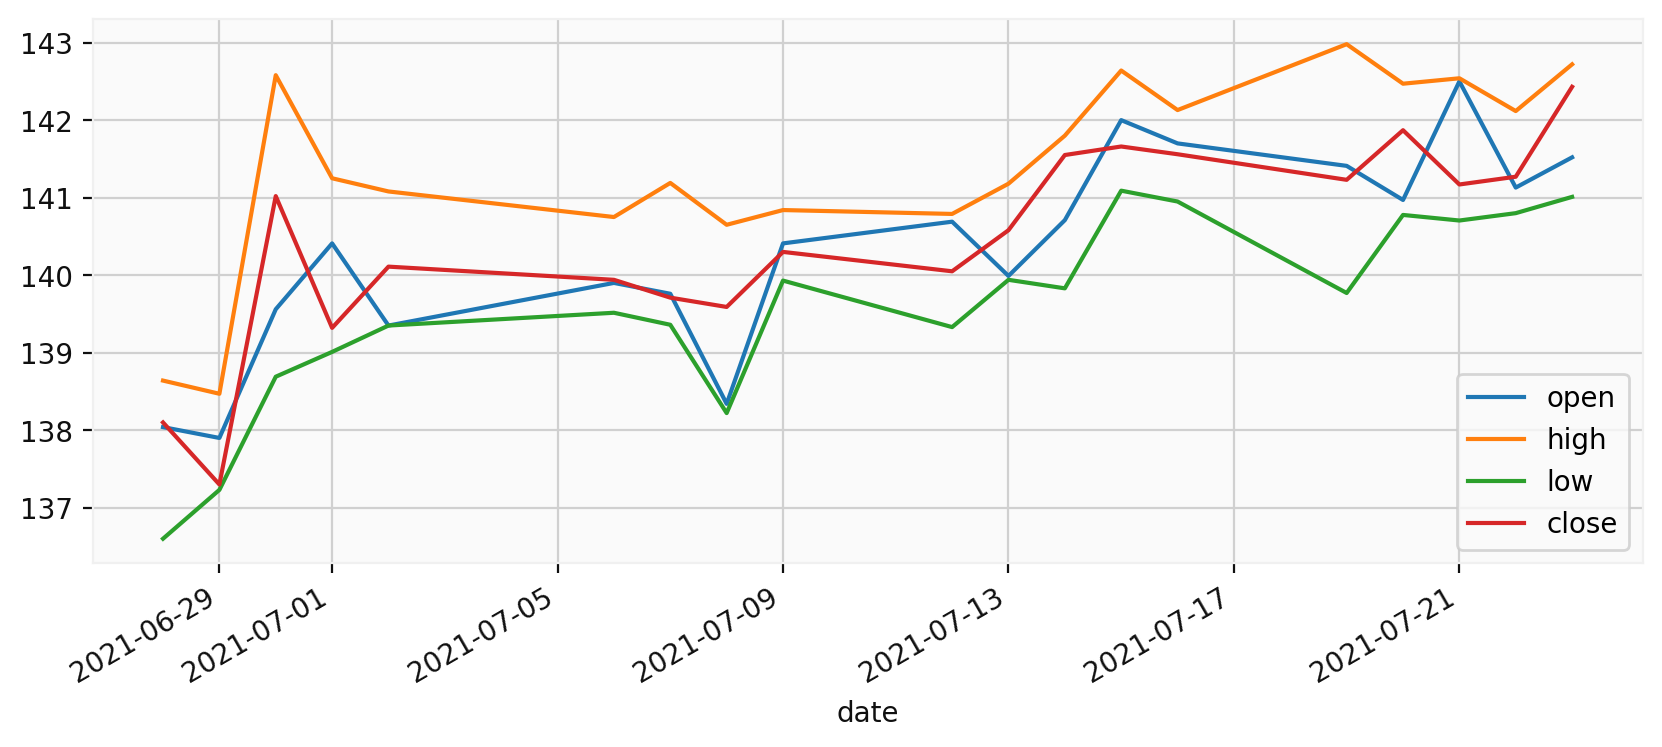

In [15]:
# Let's just plot the OHLC values as lines to start
df[["open", "high", "low", "close"]].plot(figsize=(10, 4))

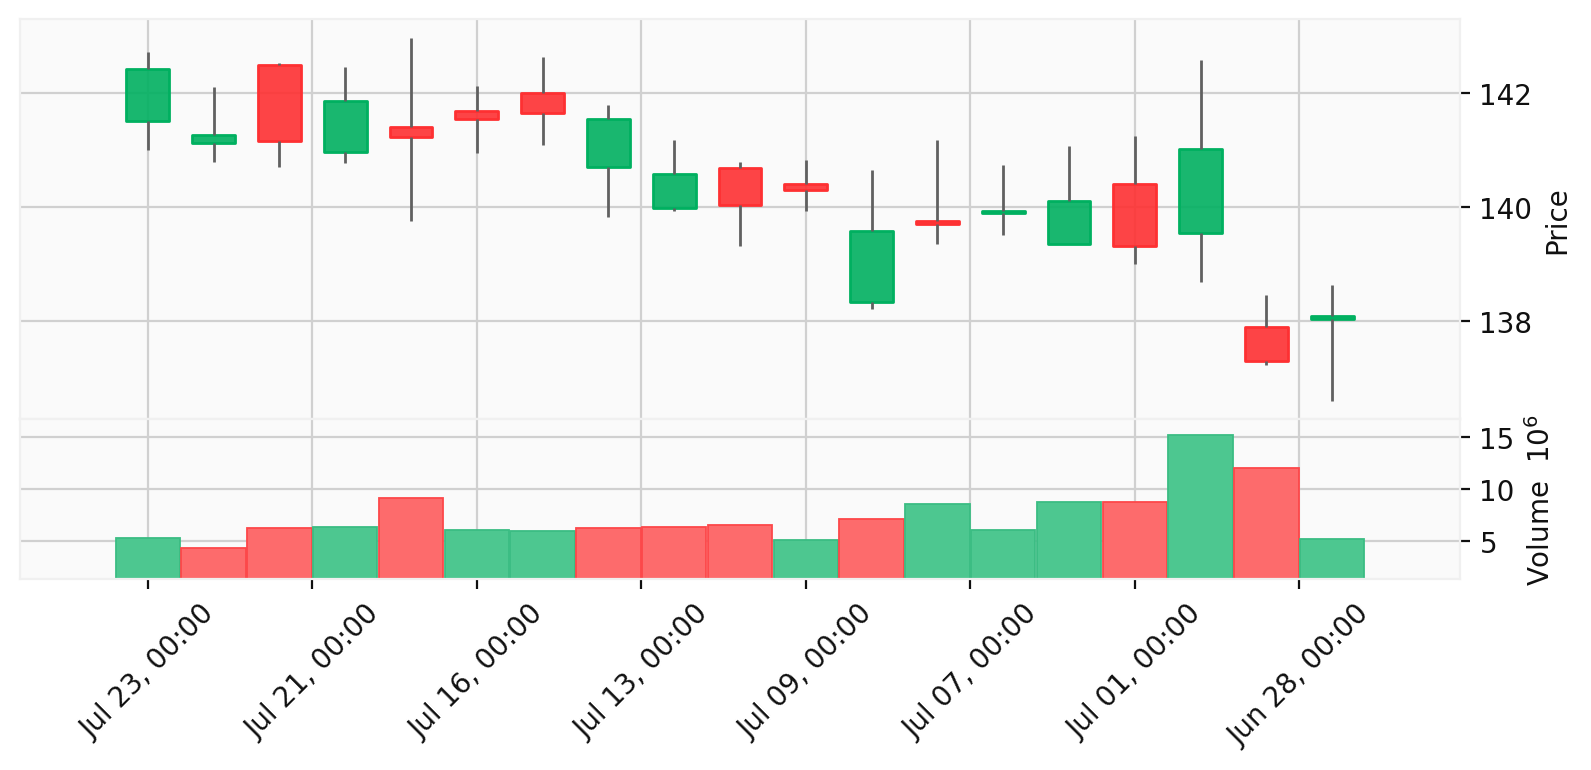

In [16]:
# Let's use mplfinance to create an OHLCV candlestick+bar plot
mpf.plot(df, type="candle", style='yahoo', volume=True, figsize=(10, 4))

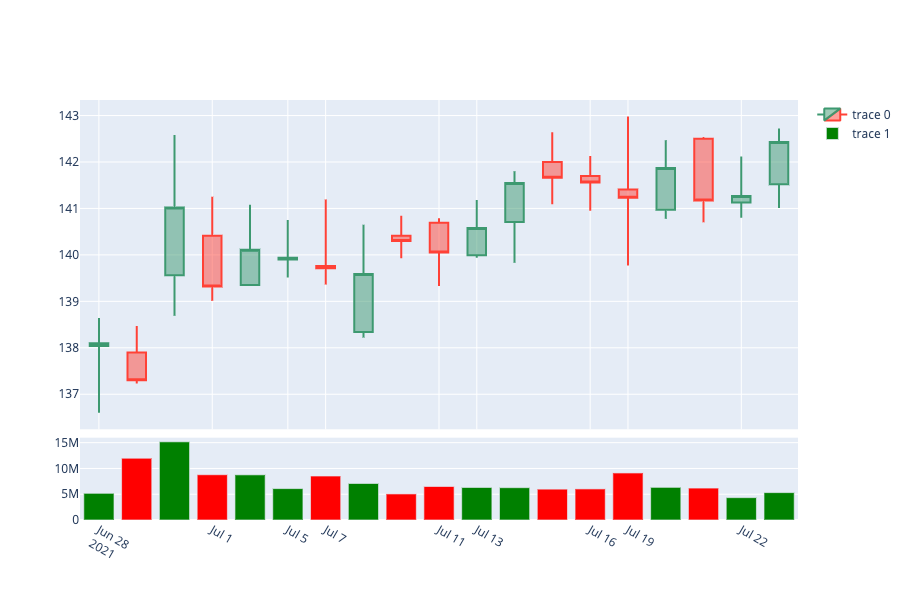

In [18]:
# Now lets use plotly to do the same

# First create 2 subplots:
#   Top for candlestick
#   Bottom for volume
fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True, 
                    row_heights=[4, 1],
                    vertical_spacing=0.02)

# Add candlestick to top with OHLC
fig.add_trace(
    go.Candlestick(x=df.index,
                   open=df['open'],
                   high=df['high'],
                   low=df['low'],
                   close=df['close']
                  ),
    row=1,
    col=1)

# Add bar to bottom for volume, color by value
fig.add_trace(
    go.Bar(
        x=df.index,
        y=df['volume'],
        marker=dict(
            color=(df["close"] > df["open"]).map({True: "green", False: "red"})  # Map to green when close > open, else red
        )
    ),
    row=2,
    col=1)

# Drop gapes due to weekends / holidays
df_tmp = df.reindex(pd.date_range(df.index[-1], df.index[0], freq='D'))
fig.update_xaxes(rangebreaks=[dict(values=df_tmp.close[df_tmp.close.isnull()].index)])

# Remove rangeslider from top subplot
fig.update_xaxes(rangeslider= {'visible':False}, row=1, col=1)

# Set height so not as squished
fig.update_layout(height=600)

# Show
fig.show()

In [ ]:
# NOTE: if you're looking at this on GitHub, the above plotly chart will not render since it requires the plotly javascript library